In [6]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
import tensorflow as tf
# Read the data
df = pd.read_csv("Final_data1.csv")
df.head()




,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,HeadwayTime,Lane,...,Velocity,XPos,YPos,LeadVehPosX,LeadVehPosY,Prediction,img1,img2,img3,img4
0,1.0,0.000448,0.001680,1.308809,0.0,0,359.999687,91.047424,23634.883010,2,...,0.004052,-741.047424,14.521678,2.310232,1629.744985,1,part1/part0.jpg,part2/part0.jpg,part3/part0.jpg,part4/part0.jpg
1,1.0,0.000700,0.018673,1.308809,0.0,0,359.999555,91.046936,1755.270561,2,...,0.052023,-741.046936,14.521676,2.310232,1629.744985,1,part1/part0.jpg,part2/part0.jpg,part3/part0.jpg,part4/part0.jpg
2,2.0,0.000808,0.030992,1.308809,0.0,0,359.999391,91.045715,1038.882160,2,...,0.087738,-741.045715,14.521673,2.310232,1629.744985,1,part1/part0.jpg,part2/part0.jpg,part3/part0.jpg,part4/part0.jpg
3,2.0,0.000791,0.037267,1.308809,0.0,0,359.999225,91.044128,856.249676,2,...,0.106383,-741.044128,14.521671,2.310232,1629.744985,1,part1/part0.jpg,part2/part0.jpg,part3/part0.jpg,part4/part0.jpg
4,2.0,0.000659,0.037458,1.308809,0.0,0,359.999085,91.042297,856.375153,2,...,0.106329,-741.042297,14.521670,2.310232,1629.744985,1,part1/part0.jpg,part2/part0.jpg,part3/part0.jpg,part4/part0.jpg


In [2]:
# Split the data into training and testing sets
X_img_train, X_img_test, X_num_train, X_num_test, y_train, y_test = train_test_split(df['img3'], numerical_features_normalized, df['Prediction'].values, test_size=0.2, random_state=42)

# Extract batches of images from the generator
X_img_train = np.array([next(gen) for _ in range(len(X_img_train) // batch_size)])
X_img_test = np.array([next(gen) for _ in range(len(X_img_test) // batch_size)])



In [3]:
print("X_img_train shape:", X_img_train.shape)
print("X_num_train shape:", X_num_train.shape)
print("y_train shape:", y_train.shape)
print("X_img_test shape:", X_img_test.shape)
print("X_num_test shape:", X_num_test.shape)
print("y_test shape:", y_test.shape)


X_img_train shape: (693, 32, 150, 150, 3)
X_num_train shape: (22200, 15)
y_train shape: (22200,)
X_img_test shape: (173, 32, 150, 150, 3)
X_num_test shape: (5550, 15)
y_test shape: (5550,)


In [4]:
image_model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(32, activation='relu')  # Output dimension can be adjusted based on your task
])
image_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [8]:
data_list = tf.stack([X_img_train, X_num_train])
y = tf.stack(y_train)
print(data_list,y)


KeyboardInterrupt



In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate

# Read the data
df = pd.read_csv("Final_data1.csv")

# Function to preprocess images
def preprocess_image(img_path):
    try:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))  # Resize images to a fixed size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Generate image data
X_img_train, X_img_test, y_train, y_test = train_test_split(df['img3'], df['Prediction'], test_size=0.2, random_state=42)
X_img_train = np.array([preprocess_image(img_path) for img_path in X_img_train])
X_img_test = np.array([preprocess_image(img_path) for img_path in X_img_test])

# Define the CNN model for image data
from tensorflow.keras.utils import to_categorical

# Modify the output layer for multi-class classification
num_classes = 5  # Number of classes (1 to 5)
image_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Change to softmax for multi-class classification
])

# Compile the model with categorical cross-entropy loss
image_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoded format
y_train_categorical = to_categorical(y_train - 1, num_classes=num_classes)
y_test_categorical = to_categorical(y_test - 1, num_classes=num_classes)

# Train the model
image_model.fit(X_img_train, y_train_categorical, epochs=10, validation_data=(X_img_test, y_test_categorical))


Epoch 1/10
694/694 [==============================] - 154s 220ms/step - loss: 0.2704 - accuracy: 0.8872 - val_loss: 0.0419 - val_accuracy: 0.9836
Epoch 2/10
694/694 [==============================] - 154s 222ms/step - loss: 0.0623 - accuracy: 0.9768 - val_loss: 0.0419 - val_accuracy: 0.9773
Epoch 3/10
694/694 [==============================] - 167s 240ms/step - loss: 0.0441 - accuracy: 0.9828 - val_loss: 0.0232 - val_accuracy: 0.9881
Epoch 4/10
694/694 [==============================] - 119s 171ms/step - loss: 0.0377 - accuracy: 0.9830 - val_loss: 0.0231 - val_accuracy: 0.9903
Epoch 5/10
694/694 [==============================] - 116s 167ms/step - loss: 0.0329 - accuracy: 0.9850 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 6/10
694/694 [==============================] - 115s 166ms/step - loss: 0.0300 - accuracy: 0.9862 - val_loss: 0.0224 - val_accuracy: 0.9917
Epoch 7/10
694/694 [==============================] - 142s 204ms/step - loss: 0.0285 - accuracy: 0.9865 - val_loss: 0.0242 -

In [2]:
# Save the model
# Save the weights of the model
image_model.save_weights("combined_model_weights.h5")



174/174 [==============================] - 6s 32ms/step


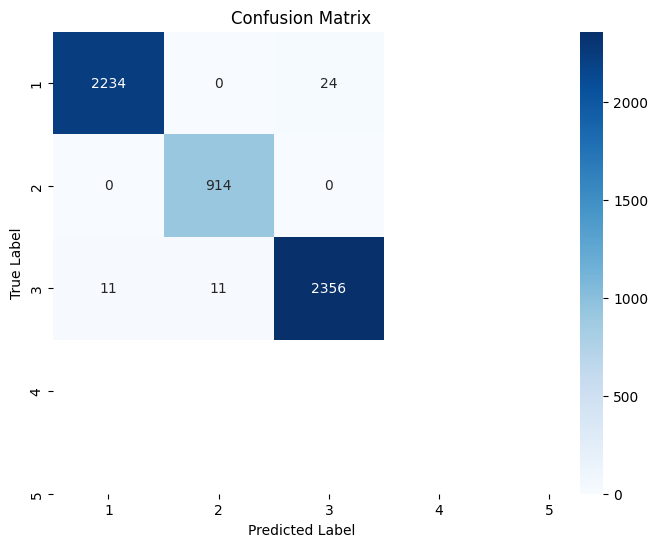

Accuracy: 0.9917117117117117
Precision: 0.9917274381573623
Recall: 0.9917117117117117
F1-score: 0.9917102782644498

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2258
           4       0.99      1.00      0.99       914
           5       0.99      0.99      0.99      2378

    accuracy                           0.99      5550
   macro avg       0.99      0.99      0.99      5550
weighted avg       0.99      0.99      0.99      5550



In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test data
y_pred_proba = image_model.predict(X_img_test)
y_pred = np.argmax(y_pred_proba, axis=1) + 1  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical.argmax(axis=1) + 1, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_categorical.argmax(axis=1) + 1, y_pred, average='weighted')
recall = recall_score(y_test_categorical.argmax(axis=1) + 1, y_pred, average='weighted')
f1 = f1_score(y_test_categorical.argmax(axis=1) + 1, y_pred, average='weighted')

# Generate classification report
class_report = classification_report(y_test_categorical.argmax(axis=1) + 1, y_pred)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_categorical.argmax(axis=1) + 1, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=np.arange(1, num_classes + 1), yticklabels=np.arange(1, num_classes + 1))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print statistics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:")
print(class_report)
